<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Фирас! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 


Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

# Прекод

# Сборный проект-4

Вам поручено разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.

### Описание данных

Данные лежат в папке `/datasets/image_search/` или доступны по [ссылке](https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip).

В файле `train_dataset.csv` находится информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `train_images` содержатся изображения для тренировки модели.

В файле `CrowdAnnotations.tsv` — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.
3. Доля людей, подтвердивших, что описание соответствует изображению.
4. Количество человек, подтвердивших, что описание соответствует изображению.
5. Количество человек, подтвердивших, что описание не соответствует изображению.

В файле `ExpertAnnotations.tsv` содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.

3, 4, 5 — оценки трёх экспертов.

Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.

В файле `test_queries.csv` находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `test_images` содержатся изображения для тестирования модели.

## 1. Исследовательский анализ данных

Наш датасет содержит экспертные и краудсорсинговые оценки соответствия текста и изображения.

В файле с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов. Для решения задачи вы должны эти оценки агрегировать — превратить в одну. Существует несколько способов агрегации оценок, самый простой — голосование большинства: за какую оценку проголосовала большая часть экспертов (в нашем случае 2 или 3), та оценка и ставится как итоговая. Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст можно исключить из датасета.

Вы можете воспользоваться другим методом агрегации оценок или придумать свой.

В файле с краудсорсинговыми оценками информация расположена в таком порядке:

1. Доля исполнителей, подтвердивших, что текст **соответствует** картинке.
2. Количество исполнителей, подтвердивших, что текст **соответствует** картинке.
3. Количество исполнителей, подтвердивших, что текст **не соответствует** картинке.

После анализа экспертных и краудсорсинговых оценок выберите либо одну из них, либо объедините их в одну по какому-то критерию: например, оценка эксперта принимается с коэффициентом 0.6, а крауда — с коэффициентом 0.4.

Ваша модель должна возвращать на выходе вероятность соответствия изображения тексту, поэтому целевая переменная должна иметь значения от 0 до 1.


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Да, это хорошая практика - дать описание контекста и проблемы, которую мы решаем. </div>

In [1]:
import urllib.request
import zipfile
import os.path
import nltk
import numpy as np
import pandas as pd
import os
import torch
import torch.nn as nn
import pickle
import urllib.request
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.io import read_image
from torchvision.models import resnet18, ResNet18_Weights
from torchvision.models.feature_extraction import create_feature_extractor
from PIL import Image
from pathlib import Path
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import GroupShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

In [2]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Firas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Firas\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Firas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
DATA_URL='https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip'
ROOT_FOLDER='./dsplus_integrated_project_4'
# исключаем повторную загрузку, если файл уже был ранее загружен
OUT_FILE=os.path.exists(ROOT_FOLDER + '.zip')
TRAIN_IMAGE_FOLDER=ROOT_FOLDER + '/to_upload/train_images'
TEST_IMAGE_FOLDER=ROOT_FOLDER + '/to_upload/test_images'
RANDOM_STATE=12345
# максимальное количество примеров
MAX_SAMPLE = 10
# папка для хранения временных данных
TMP='./cache'

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Большое тебе человеческое спасибо за вынос пути к данным в отдельную константу. Это сэкономило мне немало времени при проверке.

Очень круто и то, что ты позаботился даже о скачивании архива из бакета Яндекс Практикума и его распаковке ))
</div>

In [4]:
Path(TMP).mkdir(parents=True, exist_ok=True)

In [5]:
if OUT_FILE == False:
    # скачиваем архив
    urllib.request.urlretrieve(DATA_URL, 'dsplus_integrated_project_4.zip')
    # распаковываем
    with zipfile.ZipFile('./dsplus_integrated_project_4.zip', 'r') as zip_ref:
        zip_ref.extractall(ROOT_FOLDER)

In [6]:
train_dataset_csv = pd.read_csv(ROOT_FOLDER + '/to_upload/train_dataset.csv')

train_dataset_csv.info()

train_dataset_csv.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

In [7]:
crowd_annotations_tsv = pd.read_csv(ROOT_FOLDER + '/to_upload/CrowdAnnotations.tsv',
                                    sep='\t',
                                    header=None,
                                    names=['image', 'query_id', 'positive', 'n1', 'n2'])

crowd_annotations_tsv.info()

crowd_annotations_tsv.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image     47830 non-null  object 
 1   query_id  47830 non-null  object 
 2   positive  47830 non-null  float64
 3   n1        47830 non-null  int64  
 4   n2        47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


,image,query_id,positive,n1,n2
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.0,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.0,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.0,0,3
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.0,0,3
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.0,0,3


Описание колонок:

image - Имя файла изображения;
query_id - Идентификатор описания;
positive - Доля людей, подтвердивших, что описание соответствует изображению;
n1 - Количество человек, подтвердивших, что описание соответствует изображению;
n2 - Количество человек, подтвердивших, что описание не соответствует изображению.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

In [8]:
expert_annotations_tsv = pd.read_csv(ROOT_FOLDER + '/to_upload/ExpertAnnotations.tsv',
                                     sep='\t',
                                     header=None,
                                     names=['image', 'query_id', 'n1', 'n2', 'n3'])

expert_annotations_tsv.reset_index(inplace=True, drop=True)

expert_annotations_tsv.info()

expert_annotations_tsv.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     5822 non-null   object
 1   query_id  5822 non-null   object
 2   n1        5822 non-null   int64 
 3   n2        5822 non-null   int64 
 4   n3        5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.5+ KB


,image,query_id,n1,n2,n3
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 

Важно обратить внимание, что в датафреймах expert_annotations_tsv и train_dataset_csv содержатся одинаковые пары (изображение + описание), просто чуть разная информация,
</div>

Описание колонок:

image - Имя файла изображения;
query_id - Идентификатор описания;
n1 — оценка 1 эксперта;
n2 — оценка 2 эксперта;
n3 — оценка 3 эксперта.
Выполним обработку данных краудсорсинга:

добавим колонку n0 с агрегированной оценкой;
добавим колонку positive с долей, подтвердивших, что описание соотвествует изображению.
Эксперты ставят оценки по шкале от 1 до 4, где

1 — изображение и запрос совершенно не соответствуют друг другу;
2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует;
3 — запрос и текст соответствуют с точностью до некоторых деталей;
4 — запрос и текст соответствуют полностью.
Примечание: "положительными" будем считать оценки 3 и 4

In [9]:
# выполним обработку данных краудсорсинга
def calc_avg(row):
    """
    Вычисление результата "голосования" способом большинства

    Параметры:
    ----------
    row: Series

    Результат:
    ----------
    int - число
    """
    array = [row['n1'], row['n2'], row['n3']]
    u, c = np.unique(array, return_counts=True)

    # находим самую частую оценку
    y = u[c == c.max()]
    # вычисляем долю найденных оценок
    percentages = dict(zip(u, c / len(array)))

    # "позитивными" будем считать, тех у кого оценка 3 или 4
    row['n0'] = y[0] if len(y) == 1 else 0
    row['positive'] = percentages[y[0]] if len(y) == 1 and y[0] in [3, 4] else 0

    return row

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Мне кажется ты совершенно зря приводишь экспертны еценки к дискретному виду (0-1). Сила экспертных оценок в "непрерывной" шкале, т.е. они отражают степень соответствия изображения описанию.
    
И если изображение частично соответствует описанию, модель может это учесть (но не получит эту информацию из бинарных данных).
    
На мой взгляд лучше просто привести данные из одного масштаба в другой, но с сохранением промежуточных значений.    

</div>

In [10]:
expert_annotations_tsv = expert_annotations_tsv.apply(calc_avg, axis=1)

In [11]:
# удалим те мнения экспертов, где они полностью разошлись
expert_annotations_n0 = expert_annotations_tsv[expert_annotations_tsv['n0'] == 0]

display(expert_annotations_n0.head())

expert_annotations_tsv.drop(expert_annotations_n0.index, inplace=True)

,image,query_id,n1,n2,n3,n0,positive
17,1082379191_ec1e53f996.jpg,1536774449_e16b1b6382.jpg#2,1,2,3,0,0.0
40,1119015538_e8e796281e.jpg,2534502836_7a75305655.jpg#2,2,3,4,0,0.0
47,1122944218_8eb3607403.jpg,3325497914_f9014d615b.jpg#2,2,3,4,0,0.0
168,1287475186_2dee85f1a5.jpg,2918769188_565dd48060.jpg#2,1,2,3,0,0.0
199,1329832826_432538d331.jpg,1536774449_e16b1b6382.jpg#2,1,2,3,0,0.0


In [12]:
expert_annotations_tsv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5696 entries, 0 to 5821
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image     5696 non-null   object 
 1   query_id  5696 non-null   object 
 2   n1        5696 non-null   int64  
 3   n2        5696 non-null   int64  
 4   n3        5696 non-null   int64  
 5   n0        5696 non-null   int64  
 6   positive  5696 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 356.0+ KB


In [13]:
# для удобства установим индексы
crowd_annotations_tsv.set_index(['image', 'query_id'], inplace=True)
expert_annotations_tsv.set_index(['image', 'query_id'], inplace=True)

In [14]:
annotations = crowd_annotations_tsv[['positive']].merge(
    expert_annotations_tsv[['positive']],
    how='outer', # используем это объединение, так как нужно соеденить все данные независимо от ключа
    left_index=True,
    right_index=True,
    suffixes=('_crowd', '_expert')
)

In [15]:
display(annotations.head())

positive_crowd  \
image                     query_id                                      
1056338697_4f7d7ce270.jpg 1056338697_4f7d7ce270.jpg#2             1.0   
                          114051287_dd85625a04.jpg#2              0.0   
                          1427391496_ea512cbe7f.jpg#2             0.0   
                          2073964624_52da3a0fc4.jpg#2             0.0   
                          2083434441_a93bc6306b.jpg#2             0.0   

                                                       positive_expert  
image                     query_id                                      
1056338697_4f7d7ce270.jpg 1056338697_4f7d7ce270.jpg#2              NaN  
                          114051287_dd85625a04.jpg#2               NaN  
                          1427391496_ea512cbe7f.jpg#2              NaN  
                          2073964624_52da3a0fc4.jpg#2              NaN  
                          2083434441_a93bc6306b.jpg#2              NaN

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Пожалуйста не забывай показывать, что же получилось после такого сложного преобразования. Важно показать как несколько строк, так и общую информацию о датафрейме (через info).
    
На выпускном проекте это может быть красный комментарий.    

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">

По объединению экспертных и крауд оценок все ОК, но подсвечу возможные альтернативы
    
--------------    
    
    
В этом проекте есть несколько возможных стратегий работы с обучающими и краудсорс оценками,  вот эти стратегии с плюсами и минусами:
   

   - использовать соединение через outer, в этом случае, при корректной обработке пропусков мы можем получить более 50К размеченых пар. К плюсам данного подхода можно отнести большое количество данных. Минус - в основном это будут данные, размеченные краудсорсерами, а там качество раметки ниже.
   - использовать только экспертные оценки. плюс - высокое качество данных (разметка имеет шкалу). Минус - данных меньше.  Поясню по поводу качества разметки на примере: если на изображении одна собака, а в описании "две собаки бегут по берегу", то эксперты поставять соответствие 0,6-0,7 (переводя в шкалу 0-1), а краудсорсеры поставят 0.  Но на экспертных оценках модель хотя-бы научится находить собак, а на краудсор оценках ничему не начится.

   - использование соединения через left.  Данный подход очевидно проигрывает второму варианту: данных столько же, нужно дополнительно возиться с объединением, но качество разметки снижается.. Но это соответсвует предложениям авторов проекта, поэтому такой подход имеет право на жизнь

   - объединение через inner. Тут все плохо - и данных ОЧЕНЬ мало (в два раза меньше, чем использовать только экспертные оценки) и качество у них "подпорчено". И навыков по обработке пропусков не получаем.....
--------------------
    
Скажу честно - мой фаворит это использование только экспертных оценок (и конечно же без потери информации засчет попытки сделать бинарный ответ).    

</div>

In [16]:
def join_positive_expert_priority(row):
    """
    Объединение оценок с приоритетом для экспертов

    Параметры:
    ----------
    row: Series

    Результат:
    ----------
    int - число
    """
    crowd = row['positive_crowd']
    expert = row['positive_expert']

    if expert >= 0:
        # важны только экспертные мнения
        return expert

    # если эксперты не давали оценку, а результат есть на кроудсорсинге
    if crowd >= 0 and expert != expert:
        return crowd

    return 0

In [17]:
annotations['positive'] = annotations.apply(join_positive_expert_priority, axis=1)

In [18]:
annotations.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 51268 entries, ('1056338697_4f7d7ce270.jpg', '1056338697_4f7d7ce270.jpg#2') to ('997722733_0cb5439472.jpg', '997722733_0cb5439472.jpg#2')
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   positive_crowd   47830 non-null  float64
 1   positive_expert  5696 non-null   float64
 2   positive         51268 non-null  float64
dtypes: float64(3)
memory usage: 1.4+ MB


In [19]:
train_dataset_csv.set_index(['image', 'query_id'], inplace=True)

In [20]:
train_dataset = train_dataset_csv.merge(annotations, how='left', left_index=True, right_index=True)

In [21]:
# проверяем наличие данных и оценок по ним
train_dataset['positive'].value_counts()

0.000000    4942
1.000000     463
0.666667     342
0.333333      14
0.666667       5
0.250000       1
Name: positive, dtype: int64

In [22]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5822 entries, ('1056338697_4f7d7ce270.jpg', '2549968784_39bfbe44f9.jpg#2') to ('968081289_cdba83ce2e.jpg', '2292406847_f366350600.jpg#2')
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   query_text       5822 non-null   object 
 1   positive_crowd   2329 non-null   float64
 2   positive_expert  5696 non-null   float64
 3   positive         5767 non-null   float64
dtypes: float64(3), object(1)
memory usage: 413.9+ KB


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Обычно я рекомендую вначале внимательно познакомиться с данными, "сродниться" с ними и только потом начинать жонглировать табличками, объединяя и трансформируя их.
    
Смотри, что у нас произошло. Ты соединил экспертные оценки с крауд через внешнее соединение, у тебя получилось 50К пар, ты мучался с их агрегацией.. Но по итогу всё пересек с датафреймом train_dataset (а в нем изначально те же пары, что в в экспертных оценках)... И мы вернулись с того, с чего начали - к экспертным оценкам.
    
Учитывая технологию, которую ты выбрал (приоритет экспертным оценкам), крауд оценки вообще никак не повлияли на итоговую оценку и код с их агрегацией можно смело убрать.    
    
    
    
</div>

**Визуальный просмотр данных**
Проверим несколько случайных изображений для определения корректности "сопаставленных" изображение-описание

In [23]:
# создадим специальную функцию, которая пригодится потом

def image_show(images, titles=None, nums=None):
    """
    Функция для просмотра изображения

    Параметры:
    ----------
    images: string[] - массив путей к изображениям
    titles: string[] - заголовоки
    nums: float[] - числовые показатели
    """
    fig = plt.figure(figsize=(10, len(images) * 3))

    for i in range(len(images)):
        fig.add_subplot(len(images), 1, i + 1)
        img = Image.open(images[i])
        if titles != None:
            if nums != None:
                if nums[i] == None:
                    plt.title(f'\n{titles[i]}', fontsize = 10)
                else:
                    plt.title(f'\n{str(nums[i])}\n{titles[i]}', fontsize = 10)
            else:
                plt.title(f'\n{titles[i]}', fontsize = 10)
        plt.axis('off')
        plt.imshow(img)

    plt.show()

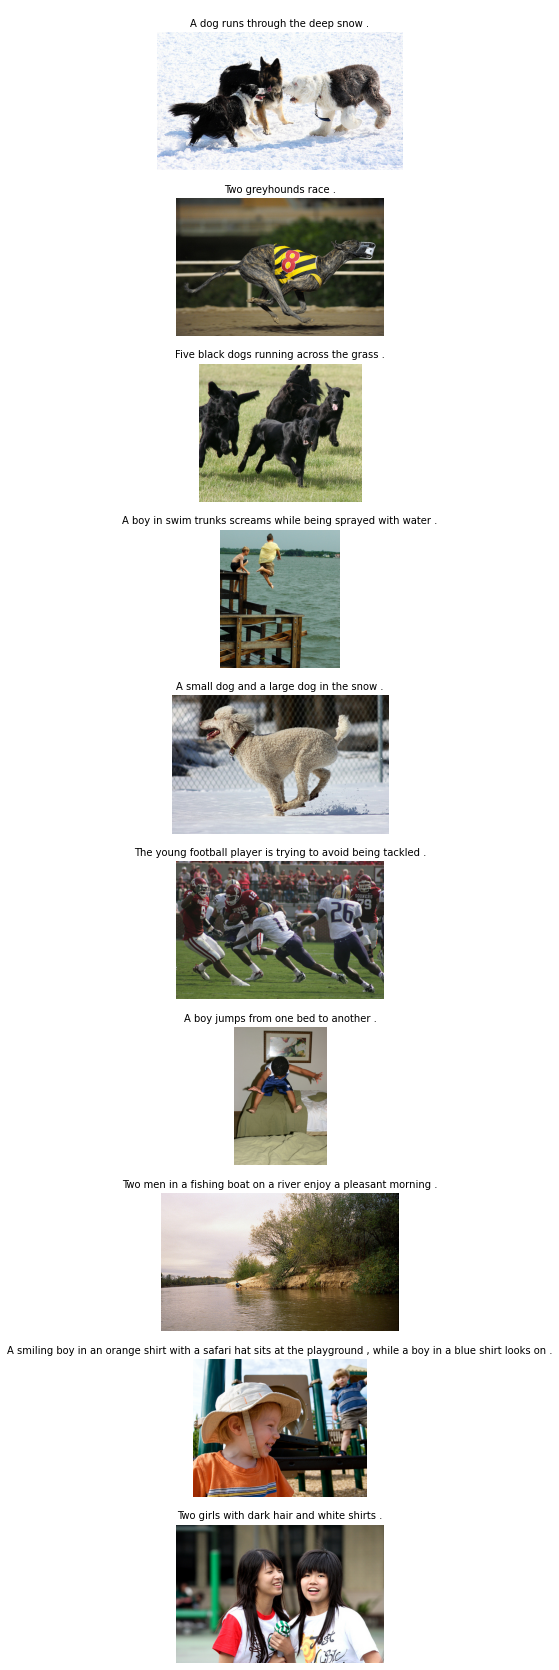

In [24]:
visual_dataset = train_dataset[train_dataset['positive'] > 0.5].sample(MAX_SAMPLE).copy()
visual_dataset.reset_index(inplace=True)

images = []
labels = []

for i in range(visual_dataset.shape[0]):
    images.append(f'{TRAIN_IMAGE_FOLDER}/{visual_dataset.iloc[i]["image"]}')
    labels.append(visual_dataset.iloc[i]['query_text'])

image_show(images, labels)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
А как же выводы?
    
В этом разделе ты решал две задачи:
    
1. Проведение разведочного анализа (глубокое знакомство с данными)
2. Трансформация данных и получение таблички (признаки/таргет). 
    
Поэтому в выводах прошу тебя осветить оба аспекта: 
  
 - рассказать что же важного мы узнали о нашем наборе данных
 - рассказать о проведенной предобработке и показать датафрейм, который мы получили как результат наших усилий
    
</div>

## выводы
в этом разделе мы ознакомились с данными с которыми мы имеем дело, файл CrowdAnnotations.tsv содержит данные по соответствию изображения и описания, полученные с помощью краудсорсинга
Описание колонок:

image - Имя файла изображения; query_id - Идентификатор описания; positive - Доля людей, подтвердивших, что описание соответствует изображению; n1 - Количество человек, подтвердивших, что описание соответствует изображению; n2 - Количество человек, подтвердивших, что описание не соответствует изображению.

файл ExpertAnnotations.tsv содержит данные по соответствию изображения и описания, полученные в результате опроса экспертов
Описание колонок:

image - Имя файла изображения; query_id - Идентификатор описания; n1 — оценка 1 эксперта; n2 — оценка 2 эксперта; n3 — оценка 3 эксперта. 

выполнил обработку данных краудсорсинга:

добавил колонку n0 с агрегированной оценкой; добавил колонку positive с долей, подтвердивших, что описание соотвествует изображению. Эксперты ставят оценки по шкале от 1 до 4, где

1 — изображение и запрос совершенно не соответствуют друг другу; 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует; 3 — запрос и текст соответствуют с точностью до некоторых деталей; 4 — запрос и текст соответствуют полностью. Примечание: "положительными" будем считать оценки 3 и 4

## 2. Проверка данных

В некоторых странах, где работает ваша компания, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно тексты, изображения, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16 лет.

В вашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:

> This image is unavailable in your country in compliance with local laws
>

Однако у вас в PoC нет возможности воспользоваться данным функционалом. Поэтому все изображения, которые нарушают данный закон, нужно удалить из обучающей выборки.

In [25]:
# стоп-слова выбирались при помощи просмотра изображений и нахождения из описаний
stop_words = [
    'baby',
    'child',
    'kid',
    'boy',
    'girl',
    'girls',
    'boys',
    'kids',
    'children',
    'babies'
]

In [26]:
def ban(txt):
    """
    Определение наличие стоп-слов

    Параметры:
    ----------
    txt: string - текст для анализа

    Результат:
    ----------
    boolean - результат обработки
    """
    txt = txt.lower()
    lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize(txt)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_tokens])

    for word in stop_words:
        word_len = len(word.split())

        if word_len > 1:
            if word in txt:
                return True
        elif word_len == 1:
            if word in txt.split():
                return True

    return False

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Идея с лемматизацией хороша. Но она очень "дорогая" - хорошая лемматизация занимает время. Кроме того ведь её нужно написать, проверить на ошибки, возможно "утащить в прод"..
    
А между тем лемматизация  нужна нам в двух случаях:  

 - При чистке датасета от детских изображений. 
 - При векторизации.
    
При поиске детских изображений я  считаю возможным упростить себе жизнь - взять возможные словоформы "запрещенных" слов. Как правиль их всего две - единственное и множественное число. 
    
А для вкторизациии делать лемматизацию в нашем случае не нужно. Модель BERT обучалась на обычных, сырых,не лемматизированных текстах.    

    
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
При тестировании твоего кода натолкнулся на странную ошибку - она "банит" фразу 'A girl playing at a park .', но отказывается банить 'Two girls on a jungle gym .'
    
Попробуй сам найти ошибку, она очень "глупая", но поискать будет полезно.    
    
</div>

In [27]:
train_dataset['ban'] = train_dataset['query_text'].apply(ban)

train_dataset[train_dataset['ban'] == True].info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1533 entries, ('1056338697_4f7d7ce270.jpg', '2549968784_39bfbe44f9.jpg#2') to ('757046028_ff5999f91b.jpg', '2061144717_5b3a1864f0.jpg#2')
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   query_text       1533 non-null   object 
 1   positive_crowd   530 non-null    float64
 2   positive_expert  1498 non-null   float64
 3   positive         1515 non-null   float64
 4   ban              1533 non-null   bool   
dtypes: bool(1), float64(3), object(1)
memory usage: 135.5+ KB


In [28]:
print(f'Будет удалено {len(train_dataset[train_dataset.ban == True])} записей')
train_dataset.drop(train_dataset[train_dataset.ban == True].index, inplace=True)
train_dataset.drop(columns=['ban'], inplace=True)

Будет удалено 1533 записей


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Ты удалил комментарии, в которых были запрещенные слова. Но наша задача убрать изображения, содержащие детей. Есть два способа сделать это:
    
 - Определить список плохих изображений, как изображения удовлетворяющие условиям:
    - Комментарий содержит плохие слова
    - <b>Оценка соответствия комментария и изображения выше порога.</b>
 - Удалить из нашего датасета все пары "изображение/описание" с плохими изображениями.
    
 
И второй, очень красивый способ. Он основан на том, что `query_id` содержит в с себе имя изображения, для которого он был написан (такая пасхалочка от авторов датасета).
    
 - Определить список плохих комментариев
 - У `query_id`  плохих комментариев отрезать два последних символа и получим список плохих изображений.
    
    
    
    
    
</div>

# 3. Векторизация изображений

Перейдём к векторизации изображений.

Самый примитивный способ — прочесть изображение и превратить полученную матрицу в вектор. Такой способ нам не подходит: длина векторов может быть сильно разной, так как размеры изображений разные. Поэтому стоит обратиться к свёрточным сетям: они позволяют "выделить" главные компоненты изображений. Как это сделать? Нужно выбрать какую-либо архитектуру, например ResNet-18, посмотреть на слои и исключить полносвязные слои, которые отвечают за конечное предсказание. При этом можно загрузить модель данной архитектуры, предварительно натренированную на датасете ImageNet.

In [29]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [30]:
# Step 1: Initialize the model with the best available weights
weights = ResNet18_Weights.DEFAULT
model = resnet18(weights=weights)
model.to(device)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms(antialias=True)

# Step 3: Create the feature extractor with the required nodes
return_nodes = {'flatten': 'flatten'}
feature_extractor = create_feature_extractor(model, return_nodes=return_nodes)

In [31]:
def get_image_vector(image_path):
    """
    Получение вектора изображения

    Параметры:
    ----------
    image_path: string - путь к изображению

    Результат:
    ----------
    torch.Tensor
    """

    # Step 4: Load the image(s) and apply inference preprocessing transforms
    image = read_image(image_path).unsqueeze(0)
    model_input = preprocess(image).to(device)

    with torch.no_grad():
        # Step 5: Extract the features
        features = feature_extractor(model_input)
        flatten_fts = features["flatten"].squeeze()

        # тут специально переводим на CPU
        return flatten_fts.to('cpu').detach().numpy()

In [32]:
# выберим одно изображение для проверки
get_image_vector(TRAIN_IMAGE_FOLDER + '/53043785_c468d6f931.jpg').shape

(512,)

In [33]:
# словарь для хранения результата обработки
image_vectors = {}

In [34]:
def images2vector(folder):
    count = 0

    for p in Path(folder).glob('*.jpg'):
        count+=1

    with tqdm(total=count) as pbar:
        for p in Path(folder).glob('*.jpg'):
            image_vectors[p.name] = get_image_vector(folder + f'/{p.name}')

            pbar.update(1)

In [35]:
# используем кэш
if os.path.exists(TMP + '/image_vectors.pickle'):
    image_vectors = pickle.load(open(TMP + '/image_vectors.pickle', 'rb'))
else:
    images2vector(TRAIN_IMAGE_FOLDER)
    pickle.dump(image_vectors, file = open(TMP + '/image_vectors.pickle', 'wb'))

In [36]:
# проверим сформированный объект
img1 = list(image_vectors.keys())[0]
image_vectors[img1].shape

(512,)

In [37]:
print(f'''Векторизация изображения на заранее обученной модели resnet18 позволило сделать вектор длинной {image_vectors[img1].shape[0]}
Уменьшение вектора позволит сэкономить ресурсы и вычислительное время при обучении.''')

Векторизация изображения на заранее обученной модели resnet18 позволило сделать вектор длинной 512
Уменьшение вектора позволит сэкономить ресурсы и вычислительное время при обучении.


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Здесь все ОК, векторизация изображений произведена верно 


Если не секрет, почему ты решил отказаться от кода, который был предложен в прекоде к проекту и использьвал другой подход к векторизации?
</div>

## 4. Векторизация текстов

Следующий этап — векторизация текстов. Вы можете поэкспериментировать с несколькими способами векторизации текстов:

- tf-idf
- word2vec
- \*трансформеры (например Bert)

\* — если вы изучали трансформеры в спринте Машинное обучение для текстов.


In [38]:
# обучать будем на специальной модели
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
model = AutoModel.from_pretrained('distilbert-base-uncased')

model.to(device)

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Li

In [39]:
#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    return sum_embeddings / sum_mask

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
В спринте по текстам мы изучали немного другой подход: снимали эмбеддинг с нулевого токена (CLS).

Однако вижу что ты решил "пойти своим путем" - взять среднее по всем токенам.
    
Если не секрет, почему выбрана именно эта стратегия?    
</div>

In [40]:
def text2vector(sentences):
    #Tokenize sentences
    encoded_input = tokenizer(sentences, padding=True, truncation=True, max_length=128, return_tensors='pt').to(device)

    #Compute token embeddings
    with torch.no_grad():
        model_output = model(**encoded_input)

    #Perform pooling. In this case, mean pooling
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

    pbar.update(1)
    ar = sentence_embeddings[0].to('cpu').detach().numpy()
    return ar

In [41]:
# используем кэш
if os.path.exists(TMP + '/train_dataset.pickle'):
    train_dataset = pickle.load(open(TMP + '/train_dataset.pickle', 'rb'))
else:
    with tqdm(total=train_dataset.shape[0]) as pbar:
        train_dataset['text2vec'] = train_dataset['query_text'].apply(lambda x: text2vector(x))

    pickle.dump(train_dataset, file = open(TMP + '/train_dataset.pickle', 'wb'))

In [42]:
train_dataset.head()

,,query_text,positive_crowd,positive_expert,positive,text2vec
image,query_id,,,,,
1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.0,0.0,"[0.1515374, -0.0973731, -0.015055675, -0.02455..."
3187395715_f2940c2b72.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.0,0.0,"[0.1515374, -0.0973731, -0.015055675, -0.02455..."
463978865_c87c6ca84c.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,0.0,0.0,0.0,"[0.1515374, -0.0973731, -0.015055675, -0.02455..."
488590040_35a3e96c89.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.0,0.0,"[0.1515374, -0.0973731, -0.015055675, -0.02455..."
534875358_6ea30d3091.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.0,0.0,"[0.1515374, -0.0973731, -0.015055675, -0.02455..."


In [43]:
print(f'После векторизации текста был создан Tensor размером {train_dataset.iloc[0]["text2vec"].shape}')

После векторизации текста был создан Tensor размером (768,)


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично,полученные векторные представления для текстов описаний с помощью BERT </div>

## 5. Объединение векторов

Подготовьте данные для обучения: объедините векторы изображений и векторы текстов с целевой переменной.

In [44]:
train_dataset.reset_index(inplace=True)

In [45]:
def image2vector(row):
    """
    По имени изображения достаём его вектор, который был создан выше

    Параметры:
    ----------
    row: Serias

    Результат:
    ----------
    numpy.ndarray
    """
    img = row['image']
    return image_vectors[img]

In [46]:
train_dataset['image2vec'] = train_dataset.apply(image2vector, axis=1)

In [47]:
def join_vectors(row):
    """
    Объединяем два вектора, текст и изображение

    Параметры:
    ----------
    row: Serias

    Результаты:
    numpy.ndarray - объдинённый вектор
    """
    return np.concatenate((row['text2vec'], row['image2vec']))

In [48]:
train_dataset['vec'] = train_dataset.apply(join_vectors, axis=1)

In [49]:
df = train_dataset.copy()

In [50]:
df.head()

,image,query_id,query_text,positive_crowd,positive_expert,positive,text2vec,image2vec,vec
0,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.0,0.0,"[0.1515374, -0.0973731, -0.015055675, -0.02455...","[0.6645436, 3.0099623, 2.894568, 0.9445691, 0....","[0.1515374, -0.0973731, -0.015055675, -0.02455..."
1,3187395715_f2940c2b72.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.0,0.0,"[0.1515374, -0.0973731, -0.015055675, -0.02455...","[0.27318442, 2.4646223, 1.6143514, 1.242461, 1...","[0.1515374, -0.0973731, -0.015055675, -0.02455..."
2,463978865_c87c6ca84c.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,0.0,0.0,0.0,"[0.1515374, -0.0973731, -0.015055675, -0.02455...","[0.9738347, 3.8057518, 1.2916154, 0.8006932, 0...","[0.1515374, -0.0973731, -0.015055675, -0.02455..."
3,488590040_35a3e96c89.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.0,0.0,"[0.1515374, -0.0973731, -0.015055675, -0.02455...","[1.5541993, 1.0708152, 0.17263107, 0.2889722, ...","[0.1515374, -0.0973731, -0.015055675, -0.02455..."
4,534875358_6ea30d3091.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.0,0.0,"[0.1515374, -0.0973731, -0.015055675, -0.02455...","[0.33821768, 3.8320777, 1.1654173, 0.51477635,...","[0.1515374, -0.0973731, -0.015055675, -0.02455..."


In [51]:
print(f'Длина итогового вектора равна {df.iloc[0]["text2vec"].shape[0]} + {df.iloc[0]["image2vec"].shape[0]} = {len(df.iloc[0]["vec"])}')

Длина итогового вектора равна 768 + 512 = 1280


In [52]:
# удаляем те записи, у которых нет оценки (это раннее удалённые записи у экспертов, которые разошлись в оценке)
df.drop(df[df['positive'].isna()].index, inplace=True)
df = df.reset_index(drop=True)

In [53]:
print(f'Вывод: после объединения двух векторов мы получаем третьи вектор длиной {len(df.iloc[0]["vec"])}, который содержит конкатинированные признаки для дальнейшего обучения.')

Вывод: после объединения двух векторов мы получаем третьи вектор длиной 1280, который содержит конкатинированные признаки для дальнейшего обучения.


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Вектора, полученные из текста и изображения объеденены👍 </div>

## 6. Обучение модели предсказания соответствия

Для обучения разделите датасет на тренировочную и тестовую выборки. Простое случайное разбиение не подходит: нужно исключить попадание изображения и в обучающую, и в тестовую выборки.
Для того чтобы учесть изображения при разбиении, можно воспользоваться классом [GroupShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html) из библиотеки sklearn.model_selection.

Код ниже разбивает датасет на тренировочную и тестовую выборки в пропорции 7:3 так, что строки с одинаковым значением 'group_column' будут содержаться либо в тестовом, либо в тренировочном датасете.

```
from sklearn.model_selection import GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
train_indices, test_indices = next(gss.split(X=df.drop(columns=['target']), y=df['target'], groups=df['group_column']))
train_df, test_df = df.loc[train_indices], df.loc[test_indices]

```

Какую модель использовать — выберите самостоятельно. Также вам предстоит выбрать метрику качества либо реализовать свою.

In [54]:
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=RANDOM_STATE)
train_indices, test_indices = next(gss.split(X=df.drop(columns=['positive']), y=df['positive'], groups=df['image']))
train_df, test_df = df.loc[train_indices], df.loc[test_indices]

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, благодаря использованию GroupShuffleSplit ты исключаешь попадание одного изображения в обучающий и валидационный наборы.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Только давай разберемся с выборками. Финальное тестирование (визуальное) мы делаем на отложенной выборке. Поэтому выборка,которую ты сейчас отделил играет роль валидационной. Есть смысл в её названии использовать слово valid а не test</div>

In [55]:
features_train = torch.FloatTensor(list(train_df.loc[:, 'vec'].values))
features_test = torch.FloatTensor(list(test_df.loc[:, 'vec'].values))

<ipython-input-55-74d94a739f06>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:277.)
  features_train = torch.FloatTensor(list(train_df.loc[:, 'vec'].values))


In [56]:
target_train = torch.FloatTensor(train_df['positive'].values).reshape(-1, 1)
target_test = torch.FloatTensor(test_df['positive'].values).reshape(-1, 1)

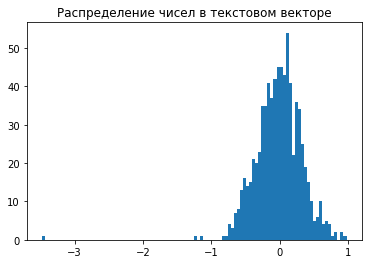

In [57]:
plt.hist(df.iloc[0]['text2vec'], bins=100)

plt.title('Распределение чисел в текстовом векторе')
plt.show()

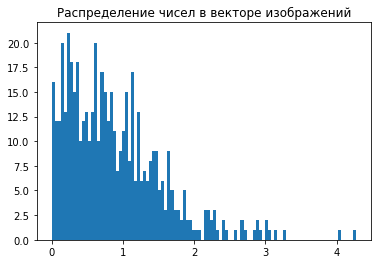

In [58]:
plt.hist(df.iloc[0]['image2vec'], bins=100)

plt.title('Распределение чисел в векторе изображений')
plt.show()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

Вывод: так как, текст и изображения распределены по разному, сделаем ниже преобразование - масштабирование

In [59]:
class TorchStandardScaler:
    """
    Специальный класс для масштабирования Tensor
    """
    def fit(self, x):
        self.mean = x.mean(0, keepdim=True)
        self.std = x.std(0, unbiased=False, keepdim=True)
    def transform(self, x):
        x -= self.mean
        x /= (self.std + 1e-7)
        return x

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Можно и так. Но я бы не стал изобретать велосипед. Можно вначале стандартизовать наши данные используя скаллер из sklean, а уже затем перевести признаки в тензоры. </div>

In [60]:
# процесс масштабирования
scaler = TorchStandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

### LinearRegression

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Мы решаем новую задачу и не знаем, наксколько хороши наши метрики и наши модели. Поэтому советую начать с бейзлайна - константной модели (можешь взять простой DummyRegressor).</div>

Обучим модель LinearRegression на созданных данных. Для проверки качества модели, здесь и ниже, буду использовать метрику RMSE.

In [61]:
model_lr = LinearRegression()
model_lr.fit(features_train, target_train)

LinearRegression()

In [62]:
pred = model_lr.predict(features_test)
rmse_lr = mean_squared_error(target_test, pred) ** 0.5

print(f'RMSE для LinearRegression равно', round(rmse_lr, 3))

RMSE для LinearRegression равно 0.508


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Как ты думаешь, почему мы получили такую метрику? Какой сигнал нам это посылает?

</div>

### Полносвязанная нейронная сеть

Далее проверим метрику качества на следуюшей модели

In [63]:
# создание датасета
class CustomDataset(Dataset):
    def __init__(self, features, target):
        self.features = features
        self.target = target

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.target[idx]

In [64]:
batch_size = 150

In [65]:
# создадим DataLoader
train_dataset = CustomDataset(features_train, target_train)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = CustomDataset(features_test, target_test)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
По моим наблюдениям чем больше размер батча, тем равномернее обучается модель (меньше стохастики). Советую взять батч максимально большим, помещающимся в модель. Насколько я знаю вся обучающая выборка может быть пропущена через небольшую модель.</div>

In [66]:
# проверим работу
train_features, train_labels = next(iter(train_dataloader))

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([150, 1280])
Labels batch shape: torch.Size([150, 1])


In [67]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1280, 4096)
        self.fc3 = nn.Linear(4096, 2048)
        self.fc4 = nn.Linear(2048, 512)
        self.fc5 = nn.Linear(512, 64)
        self.fc6 = nn.Linear(64, 1)

        self.dp = nn.Dropout(p=0.5)
        self.relu = nn.LeakyReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        #x = self.dp(x)

        x = self.fc3(x)
        x = self.relu(x)
        #x = self.dp(x)

        x = self.fc4(x)
        x = self.relu(x)
        #x = self.dp(x)

        x = self.fc5(x)
        x = self.relu(x)
        #x = self.dp(x)

        x = self.fc6(x)

        return x

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Позволь немного поругаться )))

1. Между слоями self.fc1(x) и self.fc2(x) отсутствует нелинейность. А это значит, что эти слои могут быть сокращены до одного слоя размером 1280х4096 (просто по правилу умножения матриц).
    
А теперь давай посмотрим на размеры матриц и соответствующие затраты памяти.
    
Первая матрица - 13 миллионов обучаемых параметров
Вторая матрица - почти 42 миллиона обучаемых параметров
    
    Итого - 55 миллионов, что почти в два раза больше, чем у модели Resnet50 (25,6 миллионов) и приближается к модели DistillyBert (66 миллионов параметров).
    
Основной урок: не используем гигантские матрицы (особенно если данных мало) ни в коем случае не забываем добавить нелинейность, иначе большая и крутая  нейронка по "умственным спообностям" превращается в <s>тыкву </s>  линейную регрессию.  Только учится гораздо медленне. 

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
И еще немного анализа твоей модели

 - отсутствие регуляризации (дропаута) может привести к адскому переобучению (учитывая количество данных и сложность модели)
 - Пересложненность архитектуры - слишком много нейронов (параметров) в каждом слое. Попробуй выбрать что-нибудь из диапазона   1024-512-256-128-64-1  и  1024-256-32-1.
 - Отсутствие методов нормализации (например, Batch Normalization) может привести к медленному обучению и ухудшению производительности модели. Добавление нормализации после каждого слоя может помочь стабилизировать и ускорить обучение.
 - Обычно использование настолько "крутого" дропаута резко затрудняет обучение модели. Но в этом проекте 0,5 это нормально
   
    


</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
    
10 эпох это слишком мало. Возмжожно ты по привычке  воспринимаешь "количество эпох" как гиперпараметр "спущеный с верху". Т.е. устанавливаем параметры сети, запускаем обучение и смотрим на результат.
    
Но в случае с нейронками логика ипользования немного отличается от того, к чему мы привыкли в классических моделях. Здесь лучше работать по другой логике:
    
 - оределилили архитектуру, создали модель
 - начинаем её учить. и учим пока метрика на валидационной выборке улучшается.  Наблюдая в динамике метрики на обучающей и валидационной выборках.
 - если вдруг метрика на обучающей выборке перестала снижаться, можно попробовать уменьшить шаг обучения (например в 10 раз) и продолжить обучение модели.
    
В любом случае полезно обучать модель пока метрика на валидации улучшается. Наша цель - оптимальное состояние модели, при котором модель хорошо находит законмоерности в данных, но еще не переобучилась.
        
После того, как закончили обучение смотрим на логи, анализируем, чего модели не хватило, меняем архитектуру и запускаем обучение по новой.    
    

    

    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">


Для осознанной настройки нейронки важно понимать, как менять её архитектуру (усложнять и уменьшать регуляризацию? уменьшать шаг обучения? усиливать регуляризацию?). Для того чтобы принять эти  решения мало видеть только конечную цифру, важно понимать, чего модели не хватает чтобы метрика стала лучше.
    
    
Вот типичные  проблемы, которые можно выявить  анализируя графики и пути их решения:

<b>Недообучение (Underfitting)</b>
  Признаки: Высокие значения потерь и низкая точность как на обучающей, так и на валидационной выборке. Графики потерь не снижаются (или снижаются  недостаточно).
  
  Решения:
    
 - Увеличение сложности модели (добавление слоев, увеличение числа нейронов).
 - Использование более сложных моделей, таких как более глубокие нейронные сети.
 - Увеличение количества эпох обучения.

<b>Переобучение (Overfitting)</b>
  Признаки: Значительное снижение потерь и увеличение точности на обучающей выборке, но высокие потери и низкая точность на валидационной выборке. Графики начинают расходиться после некоторого количества эпох.
    
 Решения:
  - Регуляризация (L1, L2 регуляризация).
  - Dropout (добавление Dropout слоев).
  - Уменьшение сложности модели (уменьшение числа слоев или нейронов).
  - Использование аугментации данных для увеличения разнообразия данных.
  - Раннее завершение обучения (Early Stopping) на основе валидационной ошибки.

<b>Плохой выбор гиперпараметров</b>
 Признаки: Нестабильные графики потерь и точности (большие колебания).
 
 Решения:
  - Настройка скорости обучения (learning rate).
  - Оптимизация размера батча (batch size).
  - Попробовать другие оптимизаторы (например, Adam, SGD с различными параметрами).    

</div>

In [68]:
models = Net()
models.to(device)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(models.parameters(), lr=5e-6)

epochs = 90
min_valid_loss = np.inf

Запустим обучение. Промежуточный результат будем сохранять есть метрика качества на последней эпохе лучше предыдущей.

In [69]:
for e in range(epochs):
    train_loss = 0.0
    models.train()     # Optional when not using Model Specific layer
    for data, labels in train_dataloader:
        data, labels = data.to(device), labels.to(device)

        optimizer.zero_grad()
        target = models(data)
        loss = torch.sqrt(criterion(target,labels))
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)

    valid_loss = 0.0
    models.eval()     # Optional when not using Model Specific layer

    for data, labels in test_dataloader:
        data, labels = data.to(device), labels.to(device)

        target = models(data)
        loss = torch.sqrt(criterion(target, labels))
        valid_loss += loss.item() * data.size(0)

    print(f'Epoch {e+1} \t\t Training Loss: {train_loss / len(train_dataloader)} \t\t Validation Loss: {valid_loss / len(test_dataloader)}')
    if min_valid_loss > valid_loss:
        print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        min_valid_loss = valid_loss
        # Saving State Dict
        torch.save(models.state_dict(), TMP + '/saved_model.pth')

Epoch 1 		 Training Loss: 49.37892561338165 		 Validation Loss: 43.36036064177752
Validation Loss Decreased(inf--->433.603606) 	 Saving The Model
Epoch 2 		 Training Loss: 45.874431956898086 		 Validation Loss: 42.46372176408768
Validation Loss Decreased(433.603606--->424.637218) 	 Saving The Model
Epoch 3 		 Training Loss: 44.87554109909318 		 Validation Loss: 41.82281057834625
Validation Loss Decreased(424.637218--->418.228106) 	 Saving The Model
Epoch 4 		 Training Loss: 44.06199833750725 		 Validation Loss: 41.35350348949432
Validation Loss Decreased(418.228106--->413.535035) 	 Saving The Model
Epoch 5 		 Training Loss: 43.27030944011428 		 Validation Loss: 40.9161872625351
Validation Loss Decreased(413.535035--->409.161873) 	 Saving The Model
Epoch 6 		 Training Loss: 42.577828813682906 		 Validation Loss: 40.40707525312901
Validation Loss Decreased(409.161873--->404.070753) 	 Saving The Model
Epoch 7 		 Training Loss: 41.652251877567984 		 Validation Loss: 40.19810735583305
Valid

По итогу, наилучшее качество показала модель на основе полносвязанной нейросети.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Скажу честно - результат  который ты получил неудовлетворительный ни для одной из моделей (ни для линейной модели ни для нейронной сети).

Учитвая что метрика любой константной модели из диапазона 0-1 будет меньше 1, а если использовать среднее, то скорее всего меньше чем 0,3, валидационная метрика 8 это никуда не годится.
    
Пожалуйста попробуй хотя-бы приблизиться к к разумной метрике (сделать что-то близкое к дамми модели).
    
    
    
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
В одном из проектов твоего одногрупника хорошо сработал Catboost. Не буду утверждать что и в твоем случае он хорошо себя поведет, но можешь попробовать.</div>

## 7. Тестирование модели

Настало время протестировать модель. Для этого получите эмбеддинги для всех тестовых изображений из папки `test_images`, выберите случайные 10 запросов из файла `test_queries.csv` и для каждого запроса выведите наиболее релевантное изображение. Сравните визуально качество поиска.

In [70]:
# загрузим модель
models = Net()
models.to(device)

models.load_state_dict(torch.load(TMP + '/saved_model.pth'))
models.eval()

Net(
  (fc1): Linear(in_features=1280, out_features=4096, bias=True)
  (fc3): Linear(in_features=4096, out_features=2048, bias=True)
  (fc4): Linear(in_features=2048, out_features=512, bias=True)
  (fc5): Linear(in_features=512, out_features=64, bias=True)
  (fc6): Linear(in_features=64, out_features=1, bias=True)
  (dp): Dropout(p=0.5, inplace=False)
  (relu): LeakyReLU(negative_slope=0.01)
)

In [71]:
test_images_csv = pd.read_csv(ROOT_FOLDER + '/to_upload/test_images.csv')
test_images_csv.info()
test_images_csv.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes


,image
0,3356748019_2251399314.jpg
1,2887171449_f54a2b9f39.jpg
2,3089107423_81a24eaf18.jpg
3,1429546659_44cb09cbe2.jpg
4,1177994172_10d143cb8d.jpg


In [72]:
test_queries_csv = pd.read_csv(ROOT_FOLDER + '/to_upload/test_queries.csv', sep='|', index_col=0)
test_queries_csv.info()
test_queries_csv.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   query_id    500 non-null    object
 1   query_text  500 non-null    object
 2   image       500 non-null    object
dtypes: object(3)
memory usage: 15.6+ KB


,query_id,query_text,image
63,2107838729_a527e434bd.jpg#3,A young boy throwing a rock into a pond in fro...,2107838729_a527e434bd.jpg
0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt an...",1177994172_10d143cb8d.jpg
457,634891010_9fa189effb.jpg#2,A three legged black and white dog running beh...,634891010_9fa189effb.jpg
335,3438981089_2ef1a6353c.jpg#0,a bmx rider gets some air .,3438981089_2ef1a6353c.jpg
78,2201192417_d934730fea.jpg#3,A little boy wearing a green soccer strip is r...,2201192417_d934730fea.jpg


In [73]:
image_vectors = {}

# воспользуемся ранее созданным методом
images2vector(TEST_IMAGE_FOLDER)

100%|██████████| 100/100 [00:03<00:00, 27.05it/s]


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Да, тестовые изображения нужно векторизовать заранее.</div>

### Тестирование

Создадим специальную функцию для тестирования модели

In [74]:
# загружаю изображение, которое будет показываться при запрете
urllib.request.urlretrieve('https://upload.wikimedia.org/wikipedia/commons/f/f9/No-image-available.jpg', './cache/No-image-available.jpg')

('./cache/No-image-available.jpg', <http.client.HTTPMessage at 0x1f2429ee700>)

In [75]:
def search(txt):
    """
    Функция для поиска изображений по описанию

    Параметры:
    ----------
    txt: string - описание изображения

    Результат:
    ----------
    string - путь к изображению
    string - описание
    float - вероятность
    """
    if ban(txt):
        # Выводим сообщение связанное с юридическими ограничениями
        return './cache/No-image-available.jpg', f'{txt}\nThis image is unavailable in your country in compliance with local laws', None

    vec = text2vector(txt)

    # создадим данные для модели
    data = []
    images = []

    for key in image_vectors.keys():
        images.append(key)

        img = image_vectors[key]
        data.append(np.concatenate((vec, img)))

    with torch.no_grad():
        pred = models(scaler.transform(torch.FloatTensor(data)).to(device)).to('cpu')
        # получаем индекс записи, которая больше всего подходит под описание
        idx = pred.numpy().argmax(axis=0)[0]

    return f'{TEST_IMAGE_FOLDER}/{images[idx]}', txt, pred[idx].numpy()[0]

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Помнишь я предлагал тебе отказаться от лемматизации в пользу расширения словаря? Когда я тестировал код, на фразу со словом 'girl' появился варнинг, а вот фразу с 'girls' твоя функция пропустила...
    
Насколько я понимаю ты просто забыл про лемматизацию перед проверкой на легальность запроса.    
  
</div>

In [77]:
# получаем 10 случайных примеров из тестового dataset'а
queries = list(test_queries_csv.sample(MAX_SAMPLE)['query_text'])

In [78]:
queries

['a boxer punches a boxer in the face .',
 'The brown dog is wearing a black collar .',
 'a woman dumping water on a small child who is in a pool',
 'A man sits on the gravel by an ocean .',
 'Three men form an arch during a BMX bike race sponsored by Coca-Cola .',
 'A dog wearing jeans and a shirt stands on the sidewalk .',
 'The heavy man is sitting on a bus and sleeping .',
 'A dog wrapped with straps is walking away from a red tray holding a bag .',
 'a blond man jumping off a cliff into some water',
 'The tennis player in the blue shirt is holding his racquet up in the air .']

In [79]:
images = []
labels = []
scores = []

for i in range(len(queries)):

    image_path, title, score = search(queries[i])

    images.append(image_path)
    if score == None:
        scores.append(None)
    else:
        scores.append(round(score, 3))
    labels.append(title)

NameError: name 'pbar' is not defined

In [80]:
image_show(images, labels, scores)

<Figure size 720x0 with 0 Axes>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Функции написаны и со своей задачей справляются. Принимают на вход текст и находят изображение. Отрабатывают контроль "запрещенного контента".

Да, ты прав, к сожалению работают они не очень. Причин несколько
    
 - при подготовке признаков допущена ошибка - вектора изображений перепутаны и фактически модель училась на "мусоре".
 - вектора полученные с помощью tf-idf более низкого качества, как правило лучший резульат получается при использовании эмбеддингов, полученных с помощью BERT
    
----------------
    
Как правило хороший результат в этом проекте удается достичь при выполнении следующих условий
    
 - использование экспертных оценок   
 - векторизация изображений через pytorch, как есть в теории к спринту  (но с отрезанием только одного слоя)
 - эмбеддинги через bert
 - упорное обучение нейронки (иногда тысячи эпох, в любом случае пока лосс снижается) с тщательным подбором гиперпараметров.   
    
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> комментарий</b>

исправил что мог, но в конце происходить ошибка и не поиму почиму! видь код работал выше! можишь придложить мне варианты решения пожалуйста.
</div>

## 8. Выводы

- Jupyter Notebook открыт
- Весь код выполняется без ошибок
- Ячейки с кодом расположены в порядке исполнения
- Исследовательский анализ данных выполнен
- Проверены экспертные оценки и краудсорсинговые оценки
- Из датасета исключены те объекты, которые выходят за рамки юридических ограничений
- Изображения векторизованы
- Текстовые запросы векторизованы
- Данные корректно разбиты на тренировочную и тестовую выборки
- Предложена метрика качества работы модели
- Предложена модель схожести изображений и текстового запроса
- Модель обучена
- По итогам обучения модели сделаны выводы
- Проведено тестирование работы модели
- По итогам тестирования визуально сравнили качество поиска

Наилучшее качество показывает модель на основе полносвзанной нейронной сети. Для улучшения качества модели возможно потребуется больше количество данных, а для определения "юридических ограниченний" одного вхождения стоп-слов недостаточно, наверно лучше сделать для этого отдельную модель.

Проект технически возможен, это доказывают поисковые системы. Дополнительно можно воспользоваться нейронными сетями основанными на CLIP от OpenAI, которая была обучена на большем количестве данных.

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
<hr>    
    
Также неплохо работает следующий подход без предобученных моделей (к тому же легко реализуемый).
    
    
Вместо того, чтобы подавать на вход модели изображение + текст и получать меру соответствия, поступаем по другому. 
    
На вход модели подаем вектор описания, а на выходе учимся предсказывать вектор изображения. 
    
По поводу метрик тут ситуация следующая. Точно работает следующий подход
    
  - берем метрику mse, но тогда нужно чтобы модель её уменьшала. А значит в обучении используем только пары заведомо сответствующие друг другу

Можно попробовать использовать косинусное расстояние, она позволяет использовать все данные (если есть соответствие то выдает 1, если нет то 0). 
    
Также можно попробовать усложнить модель, например и изображения и тексты отправлять в пространство размерностью 256 и уже в этом пространстве учиться их "сближать".
    
По поводу методов векторизации: я бы использовать resnet18 для изображений (размерность эмбеддинга избражения 512) и БЕРТ для текстов (768). 
    
   
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Подведем итоги. Я вижу, что в целом с проектом ты справляешься.
    
Проведено исследование и предобработка данных. Выполнена векторизация изображений и текстовых описаний. Обучены модели для предсказания степени соответствия, а также написана функция для инференса и с её помощью проведено тестирование.
 
Пожалуйста разберись с красными комментариями.
    
Желтые комментарии на твое усмотрение. Но учитывая что наш подход "не взлетел" и нужно хоть что-то показать заказчику, попробуй показать возможный инференс с помщью CLIP. С библиотекой sentence-transformers это делается буквально в 10 строк.    
Жду твою работу на повторное ревью.
</div>